In [1]:
from qiskit import*
from math import*
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_bloch_multivector
sim = Aer.get_backend('aer_simulator')
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi

In [2]:
#Validating the initial states

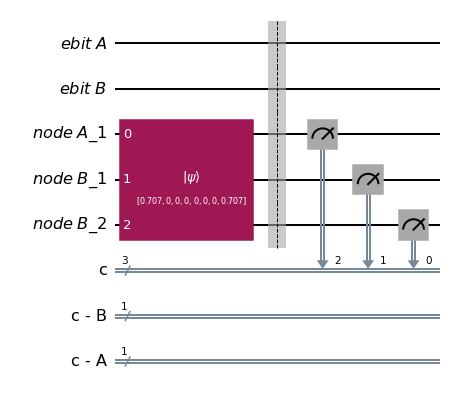

In [3]:
q1 = QuantumRegister(1,'node A_1')
q2 = QuantumRegister(1,'node B_1')
q3 = QuantumRegister(1,'node B_2')
q4 = QuantumRegister(1,'ebit A')
q5 = QuantumRegister(1,'ebit B')
c1 = ClassicalRegister(1,'c - B')
c2 = ClassicalRegister(1,'c - A')

qc = QuantumCircuit(0, 3)
qc.add_register(c1)
qc.add_register(c2)
qc.add_register(q4)
qc.add_register(q5)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)

#step 1: Making input states
initial_state = [1/sqrt(2),0,0,0,0,0,0,1/sqrt(2)]
qc.initialize(initial_state, [2,3,4])
qc.save_statevector()

qc.measure([2,3,4],[2,1,0])

qc.draw(output='mpl',style = 'iqx')

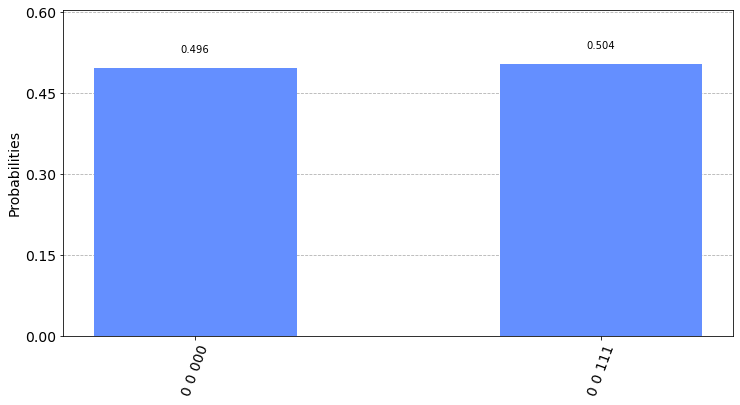

In [4]:
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(12,6))

In [5]:
#Protocol to implement Toffoli gate using Maximally entangled state

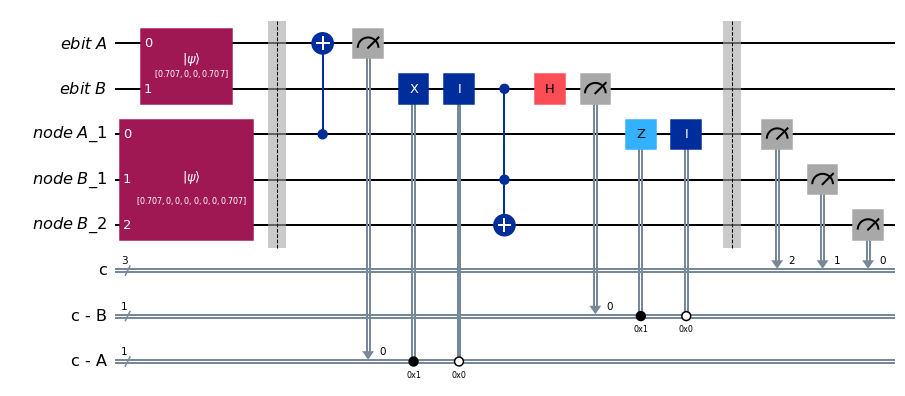

In [7]:
q1 = QuantumRegister(1,'node A_1')
q2 = QuantumRegister(1,'node B_1')
q3 = QuantumRegister(1,'node B_2')
q4 = QuantumRegister(1,'ebit A')
q5 = QuantumRegister(1,'ebit B')
c1 = ClassicalRegister(1,'c - B')
c2 = ClassicalRegister(1,'c - A')

qc = QuantumCircuit(0, 3)
qc.add_register(c1)
qc.add_register(c2)
qc.add_register(q4)
qc.add_register(q5)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)

def X_measurement(qc,qubit,cbit):
    qc.h(qubit)
    qc.measure(qubit,cbit)
    return qc

#step 1: Making input states
initial_state = [1/sqrt(2),0,0,0,0,0,0,1/sqrt(2)]
qc.initialize(initial_state, [2,3,4])

# step 2: Making Maximally entangled states
a= 1
initial_state = (1/sqrt(1+(a*a)))*np.array([1,0,0,a])
qc.initialize(initial_state, [0,1])

qc.save_statevector() 

#step 3: CNOT btwn A1 and A
qc.cx(2,0)

#step 4: Measuring A in Z-basis
qc.measure(0,c2)
qc.x(1).c_if(c2, 1)
qc.id(1).c_if(c2, 0)

#step 5: CNOT btwn B and B1
qc.ccx(1, 3, 4)

#step 6: Measuring B in X-basis after hadamarding
qc.h(1)
qc.measure(1,c1)
qc.z(2).c_if(c1, 1)
qc.id(2).c_if(c1, 0)

qc.barrier()
qc.measure([2,3,4],[2,1,0])


qc.draw(output='mpl',style = 'iqx')#.savefig('bipartite-circ-mes.svg',dpi=600)

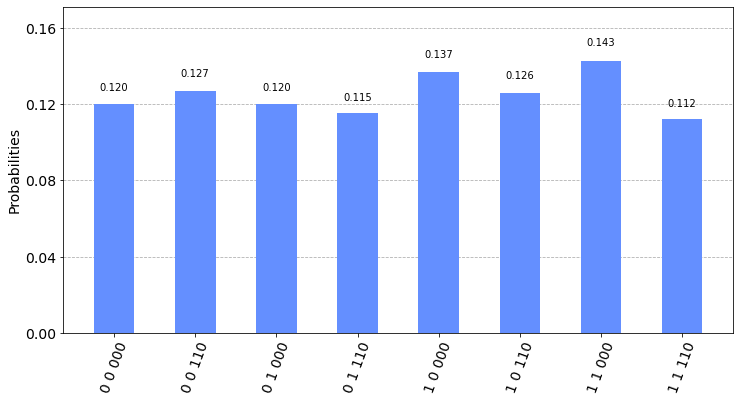

In [8]:
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(12,6))

In [9]:
#Protocol using Non-maximally entangled states

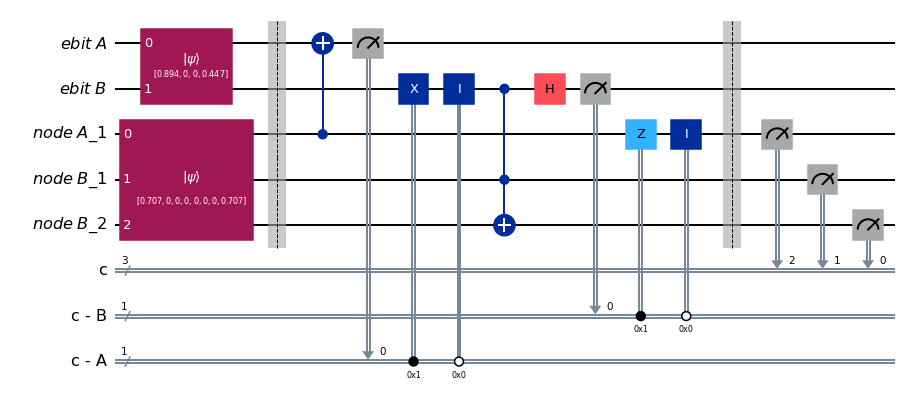

In [10]:
q1 = QuantumRegister(1,'node A_1')
q2 = QuantumRegister(1,'node B_1')
q3 = QuantumRegister(1,'node B_2')
q4 = QuantumRegister(1,'ebit A')
q5 = QuantumRegister(1,'ebit B')
c1 = ClassicalRegister(1,'c - B')
c2 = ClassicalRegister(1,'c - A')

qc = QuantumCircuit(0, 3)
qc.add_register(c1)
qc.add_register(c2)
qc.add_register(q4)
qc.add_register(q5)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)

def X_measurement(qc,qubit,cbit):
    qc.h(qubit)
    qc.measure(qubit,cbit)
    return qc

#step 1: Making input states
initial_state = [1/sqrt(2),0,0,0,0,0,0,1/sqrt(2)]
qc.initialize(initial_state, [2,3,4])

# step 2: Making Non-maximally entangled states
a= 0.5  #this is the degree of entanglement which can be altered accordingly
initial_state = (1/sqrt(1+(a*a)))*np.array([1,0,0,a])
qc.initialize(initial_state, [0,1])

qc.save_statevector() 

#step 3: CNOT btwn A1 and A
qc.cx(2,0)

#step 4: Measuring A in Z-basis
qc.measure(0,c2)
qc.x(1).c_if(c2, 1)
qc.id(1).c_if(c2, 0)

#step 5: CNOT btwn B and B1
qc.ccx(1, 3, 4)

#step 6: Measuring B in X-basis after hadamarding
qc.h(1)
qc.measure(1,c1)
qc.z(2).c_if(c1, 1)
qc.id(2).c_if(c1, 0)

qc.barrier()
qc.measure([2,3,4],[2,1,0])


qc.draw(output='mpl',style = 'iqx')#.savefig('bipartite-circ-nmes.svg',dpi=600)

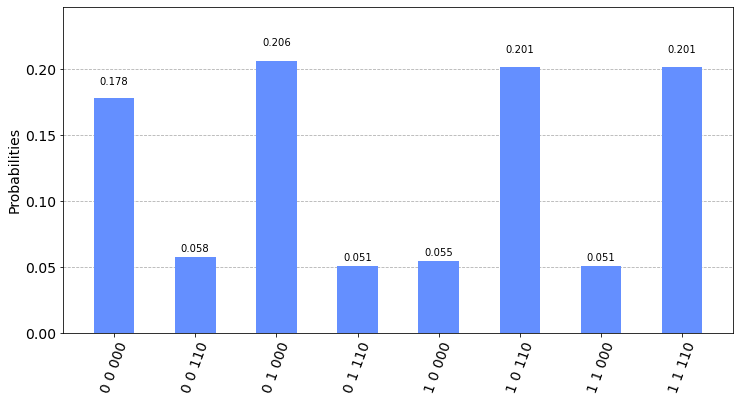

In [11]:
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(12,6))